<h1 style="color:rgb(0,120,170)">Assignment 5: ICA</h1>

*This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.*

The cumulant-generating function $K_X(t)$ of a random variable $X$ is defined as 
the natural logarithm of the moment-generating function
\begin{equation}
  \newcommand\E{\operatorname{\mathbb{E}}}
  \newcommand\dif{\mathrm{d}}
  K_X(t) = \log \E\left[e^{tX}\right]. 
\end{equation}
Let $\kappa_n(X) = K_X^{(n)}(0)$ the $n$-th derivative of $K_X(t)$ evaluated at $t=0$, 
then the Maclaurin series is 
\begin{equation}
  K_X(t) = \sum_{n=1}^\infty \kappa_n(X) \frac{t^n}{n!}. 
\end{equation}

<h2 style="color:rgb(0,120,170)">Task 1 (20 Points)</h2>
Show that if the random variables $X$ and $Y$ are independent then 
$\kappa_n(X+Y) = \kappa_n(X) + \kappa_n(Y)$ and $\kappa_n(\alpha X) = \alpha^n \kappa_n(X)$
holds. 

$$0) \kappa_n(X+Y) = \kappa_n(X) + \kappa_n(Y) $$
$$1) K_{X+Y}(t) = \log \mathbb{E}[e^{t(X+Y)}] $$
$$2) \mathbb{E}[e^{t(X+Y)}] = \mathbb{E}[e^{tX} \cdot e^{tY}] = \mathbb{E}[e^{tX}] \cdot \mathbb{E}[e^{tY}] $$
$$3) K_{X+Y}(t) = \log \mathbb{E}[e^{tX}] + \log \mathbb{E}[e^{tY}] = K_X(t) + K_Y(t) $$
$$4) K_{X+Y}^{(n)}(t) = K_X^{(n)}(t) + K_Y^{(n)}(t) \quad \text{and} \quad t = 0 $$
$$5) K_{X+Y}^{(n)}(0) = K_X^{(n)}(0) + K_Y^{(n)}(0) = \kappa_n(X) + \kappa_n(Y) $$


$$0) \kappa_n(\alpha X) = \alpha^n \kappa_n(X) $$
$$1) K_{\alpha X}(t) = \log \mathbb{E}[e^{t(\alpha X)}] = \log \mathbb{E}[e^{(\alpha t)X}] = K_X(\alpha t) $$
$$2) K_{\alpha X}^{(n)}(t) = \frac{d^n}{dt^n} K_X(\alpha t) = \frac{\alpha^n t^n}{n!} \cdot K_X^{(n)} = \sum_{n=1}^{\infty} \kappa_n(X) \frac{(\alpha t)^n}{n!} = \sum_{n=1}^{\infty} \kappa_n(X) \frac{\alpha^n t^n}{n!} = \sum_{n=1}^{\infty} \kappa_n(X) \cdot \frac{n(n-1)(n-2)\cdots(\alpha t)^n}{n!} = \sum_{n=1}^{\infty} \kappa_n(X) \cdot \frac{\alpha^n t^{n-2}}{n!} = \sum_{n=1}^{\infty} \kappa_n(X) \cdot \frac{n!\alpha^n t^{0}}{n!}$$
$$3) \frac{d^n}{dt^n}K_{\alpha X}(t) = \alpha^n \frac{d^n}{dt^n}K_X(\alpha t) $$
$$4) K_{\alpha X}^{(n)}(0) = \alpha^n K_X^{(n)}(0) = \alpha^n \kappa_n(X) $$


<h2 style="color:rgb(0,120,170)">Task 2 (20 Points)</h2>

Show that the first four cumulants of a centered random variable $X$, i.e. $\E[X] = 0$, are 
  \begin{equation}
    \kappa_1 = 0,\quad\kappa_2 = \E[X^2],\quad\kappa_3 = \E[X^3],\quad\text{and}\quad\kappa_4 = \E[X^4] - 3(\E[X^2])^2,
  \end{equation}
respectively. *Hint:* Combine the Taylor expansions $\E[e^{tX}] = \sum_{n=0}^\infty \E[X^n]\frac{t^n}{n!}$ and $\log(1 + a) = \sum_{n=1}^\infty a^n \frac{(-1)^{n+1}}{n}$ and drop all terms of order higher than 4. 

########## YOUR SOLUTION HERE ##########

<h2 style="color:rgb(0,120,170)">Task 3 (20 Points)</h2>

Consider a standard normal random variable $X \sim p(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}$. Show that $\E[X] = 0$ and $\E[X^n] = (n-1) \E[X^{n-2}]$ for $n \geq 2$ and use this to determine the third and fourth cumulants of $X$. *Hint:* Use the fact that $\int f'(x) e^{f(x)} \dif x = e^{f(x)}$. 

<h2 style="color:rgb(0,120,170)">Task 4 (20 Points)</h2>

Compare PCA and ICA at the example of the `cifar-10.npy` dataset. Load the dataset, perform PCA and ICA using the implementations of the `sklearn.decomposition` package with 100 components each. Then visualize the components extracted by the two methods using the provided functions `show_image` and `scale`. What differences do you observe and how do they relate to the properties of PCA and ICA? 

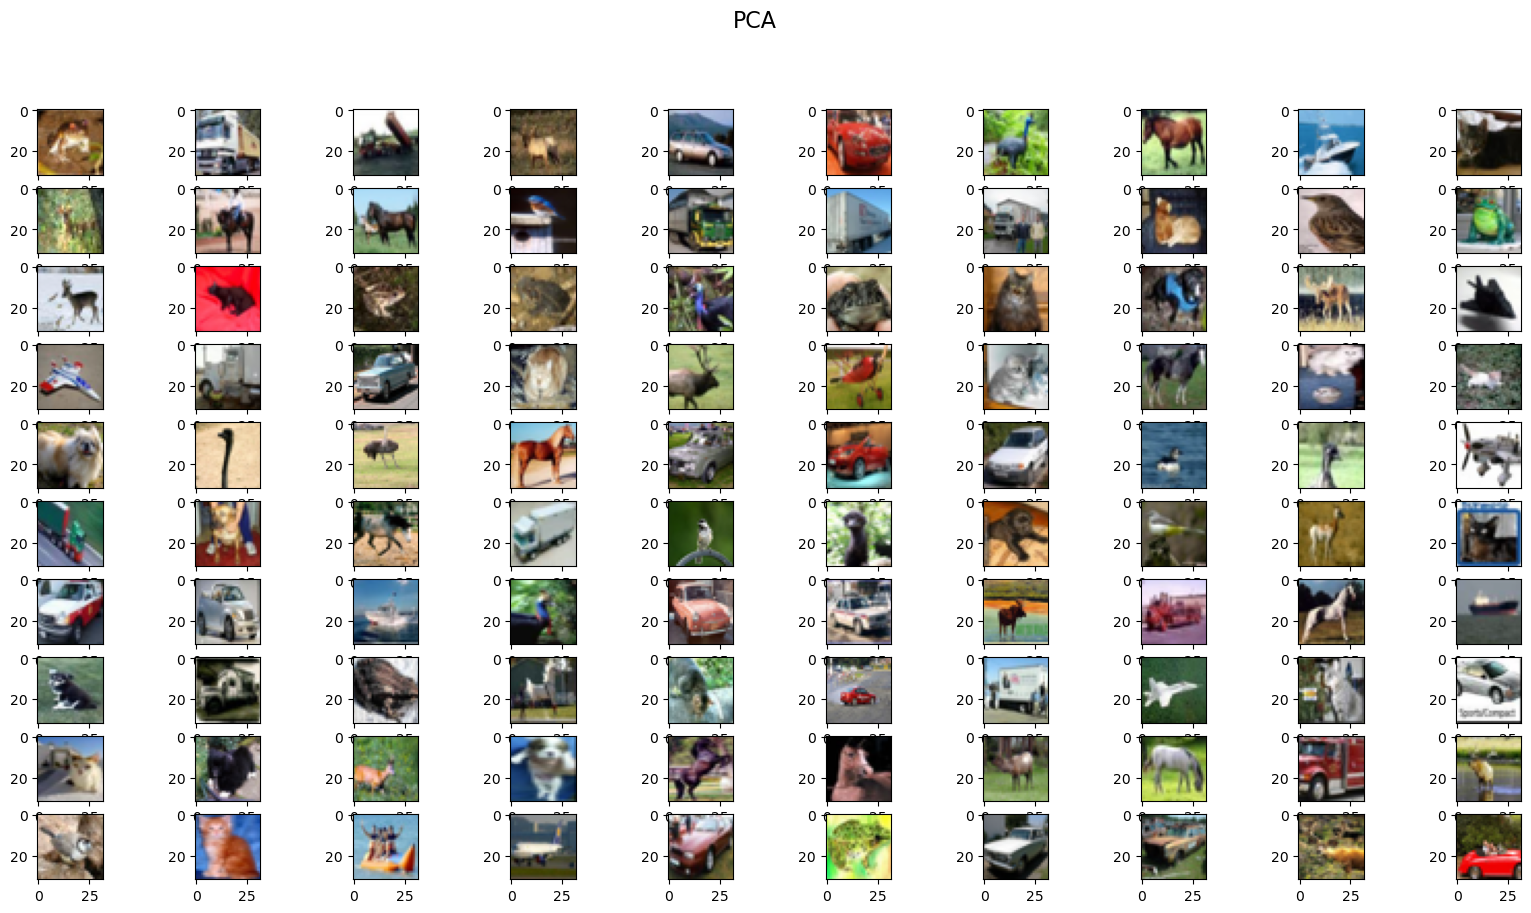

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA, FastICA

def scale(s, a=0, b=1):
    return (b - a) * (s - s.min()) / (s.max() - s.min()) + a

def show_image(img):
    plt.imshow(img.reshape(3, 32, 32).transpose((1, 2, 0)))
    
data = np.load(r"C:\Users\azatv\Jupyter\JupyterProjects\ML Not Super\A5\cifar-10.npy")

# pca = PCA(n_components=100)
# pca_components = pca.fit_transform(data)

# ica = FastICA(n_components=100)
#ica_components = ica.fit_transform(data)

plt.figure(figsize=(20, 10))
for i, component in enumerate(data[:100]):
    plt.subplot(10, 10, i + 1)
    show_image(scale(component))
plt.suptitle('PCA', fontsize=16)
plt.show()

# plt.figure(figsize=(20, 10))
# for i, component in enumerate(ica.components_[:100]):
#     plt.subplot(10, 10, i + 1)
#     show_image(scale(component))
# plt.suptitle('ICA', fontsize=16)
# plt.show()

<h2 style="color:rgb(0,120,170)">Task 5 (20 Points)</h2>

Consider the cocktail party problem. Read the left channel of the files `birds.wav`, `ocean.wav`, `frogs.wav` using the `scipy.io.wavfile` package. Then construct a full-rank $3 \times 3$ mixing matrix and produce 3 different mixings of those signals. You can listen to them using the `sounddevice` package. Finally, use `FastICA` from the `sklearn.decomposition` package to recover the original sources. Listen to the recovered sources and compare them to the originals to check if ICA was successful. *Hint:* Scale the signals to $[-1,1]$ before playing them. 

48000
(960000, 2)
number of channels = 2
length = 20.0s


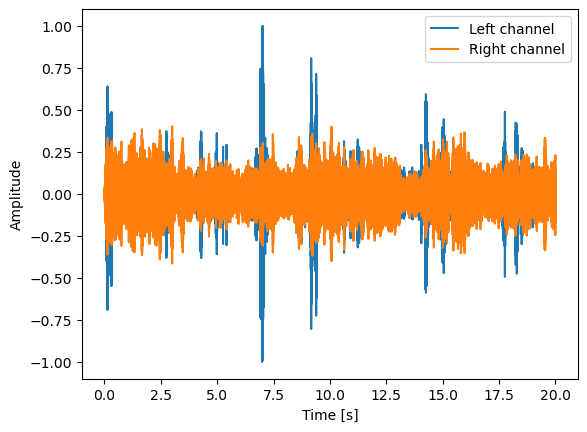

path: birds.wav, shape left: (960000,)
path: ocean.wav, shape left: (960000,)
path: frogs.wav, shape left: (960000,)
(3, 960000)


In [ ]:
import numpy as np
from scipy.io import wavfile
import sounddevice as sd
from sklearn.decomposition import FastICA
import os

def scale_signal(signal):
    return signal / np.max(np.abs(signal))

wav_fname = "birds.wav"
samplerate, data = wavfile.read(os.path.join(os.getcwd(),wav_fname))
print(samplerate)
print(np.shape(data))
print(f"number of channels = {data.shape[1]}")
length = data.shape[0] / samplerate
print(f"length = {length}s")

time = np.linspace(0., length, data.shape[0])

plt.plot(time, data[:, 0], label="Left channel")

plt.plot(time, data[:, 1], label="Right channel")

plt.legend()

plt.xlabel("Time [s]")

plt.ylabel("Amplitude")

plt.show()

file_paths = ['birds.wav', 'ocean.wav', 'frogs.wav']
signals = []

for path in file_paths:
    rate, data = wavfile.read(os.path.join(os.getcwd(),path))
    left_channel = data[:, 0]
    print(f"path: {path}, shape left: {np.shape(left_channel)}")
    signals.append(left_channel)

signals = np.array(signals)

A = np.random.rand(3, 3)

mixed_signals = np.dot(A, signals)

ica = FastICA(n_components=3)
recovered_signals = ica.fit_transform(mixed_signals.T).T  

mixed_signals /= np.max(np.abs(mixed_signals), axis=1).reshape(-1, 1)
recovered_signals /= np.max(np.abs(recovered_signals), axis=1).reshape(-1, 1)
print(np.shape(mixed_signals))
sd.play(mixed_signals[0], samplerate=rate)
# sd.play(recovered_signals[0], samplerate=rate)
